In [ ]:
import math
import numpy as np
import pandas as pd
import csv
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
#use english units or comment 
a=1003.2 #ft/s or 684mph at 25000ft
v_stall = 200.65 #ft/s = 118 kts
v_cruise = 590 #ft/s
v_to = 220.7 #ft/s take off or lift off
rho1 = 0.03133 #lbm/ft^3 or 0.001066 slugs/ft^3
rho2 = 0.0765 #lbm/ft^3 or 0.001066 slugs/ft^3
W_S_to = 86
W_S_stall = 98.90 #lbs/ft^2
W_S_cruise = 1043 #lbs/ft^2
W_0 = 68343 #lbs, 29850 kg
W_to = 68000 #lbs
A=12

In [ ]:
S_wing=W_to/W_S_to
print("Wing Area in ft",S_wing,"\n")
b=(A*S_wing)**0.5
print("Wing Span in ft",b, "or in meter",b/3.281)
w_c_root=(1.38*S_wing)/b
w_c_tip=0.45*w_c_root
print("root chord in ft",w_c_root)
print("root chord in ft",w_c_tip)

Wing Area in ft 790.6976744186046 

Wing Span in ft 97.40827527999485 or in meter 29.688593501979533
root chord in ft 11.201951657199407
root chord in ft 5.040878245739734


In [ ]:
q = 0.5*rho1*(v_to**2)
Cl_design = W_S_to/q
print("Cl_design based on cruise ",Cl_design)

Cl_design based on cruise  0.11271024289417297


In [ ]:
# Fuse = 0.37*(W_to**0.51) #Table 6.3 (page 157) fuse lenth deisgn
Fuse = 91
print("Fuse length: ",Fuse,"ft or",Fuse/3.281,"meters")

Fuse length:  91 ft or 27.735446510210302 meters


In [ ]:
b_HT = 26.2467 #ft. this is your ELEVETAOR guestimated span about 8-meters
# cE=[10, 11, 12, 13] #this is your MAIN WING chord range in inches
c_HT = 0.9 #this coefficent are in reyman books provided the type of plane on table. 
L_HT = 0.52*Fuse  #destance from Leading edge of wing to leading edge of elevator. about 50-55% for twin turboprop 
C_Wmac = 8.51 #mean aerodynamic chord for the wing (obtain it from xflr wing desing)
S_HT=(c_HT*C_Wmac*S_wing)/L_HT
print('Elevator Area S_HT:',round(S_HT,4), '\nRoot Chord:',round(2*S_HT/(1.6*b_HT),3),'\nTip Chord:',round((2*S_HT)/(2.6667*b_HT),3)) #all in ft

Elevator Area S_HT: 127.9787 
Root Chord: 6.095 
Tip Chord: 3.657


In [ ]:
y_VT = 14.7638 #ft. this is your Fin guestimated span about 4.5 meters. root chord = 11.1549 or 3.4m
# cE=[10, 11, 12, 13] #this is your MAIN WING chord range in inches
c_VT = 0.08 #this coefficent are in reyman books provided the type of plane on table. 
L_VT = 0.54*Fuse  #destance from Leading edge of wing to leading edge of elevator. about 50-55% for twin turboprop 
b_W = 86.25873439810051 #wing span (obtain it from xflr wing desing)
S_VT=(c_VT*b_W*S_wing)/L_VT
print('Fin Area S_VT:',round(S_VT,3), '\nRoot Chord:',round(2*S_VT/(1.61*y_VT),3),'\nTip Chord:',round((2*S_VT)/(2.63934*y_VT),3)) #all in ft

Fin Area S_VT: 111.037 
Root Chord: 9.343 
Tip Chord: 5.699


In [ ]:
w_lamda = 0.45
delta=0
A_w = 12
S_wa = 790
W_fw = 13941
W_dg = 68000
N_z = 1.5*3.15
q_b = 0.5*rho1*(v_cruise**2)
W_wing = 0.036*(S_wa**0.758) * (W_fw**0.0035) * (A_w/(np.cos(delta)**2))**0.6 * (q_b**0.006) * w_lamda**0.04 * (24/np.cos(delta))**-0.3 * (N_z*W_dg)**0.49
print(W_wing)

5100.218737158315


In [ ]:
#Wing leading edge location to determine cg 
#this assumes our nose is the origin
C_Vmac = 7.70 #ft
C_Hmac = 4.49 #ft
wing_x_v = 0.46*Fuse - (0.25*C_Wmac + .75*C_Vmac) #remaining fuse minuse the .75*C_macW and .75*C_Vmac
print("X_location_52 ", wing_x_v)
wing_x_h = 0.46*Fuse - (0.25*C_Wmac + .75*C_Vmac) #remaining fuse minuse the .75*C_macW and .75*C_Hmac
print("X_location_54 ", wing_x_h)
wing_x = 0.5*(wing_x_v+wing_x_h)
print("X_location_average ", wing_x)
# v_tail_LE=0.25*w_c_root

X_location_52  33.957499999999996
X_location_54  33.957499999999996
X_location_average  33.957499999999996


In [2]:
We = 35723 #Empty wegiht
V = 590 #Maximum velocity fos
Q = 10 #production number in five years
FTA = 3 #Number of test aircraft
Mmax = .54 #Max Mach Number (estimated)
Re = 115
Rt = 118
RO = 108
Rm = 98
Neng = 10*2
Mmax = .25
Tmax = .2*68343 #max thrust from one engine
T_inlet = 519 #temp in K
Eng_cost = 2*1300000 #engine cost
# carcost = 60000

In [3]:
#R&D and fLyaway
He=(4.86*(We**(0.777)))*(V**(0.894))*(Q**(0.163))
print("Enginering Hours He ", He)
Ht=(5.99*(We**(0.777)))*(V**(0.696))*(Q**(0.263))
print("Tooling Hours Ht = ",Ht)
Hm=(7.37*(We**(0.82)))*(V**(0.484))*(Q**(0.641))
print("Manufacturig Hours Hm = ",Hm)
Hq=0.076*(Hm)
print("Qulity Control Hours Hq = ", Hq)
Cd=(91.3 * We**(0.630)) * V**1.3 
print("Developemnt Cost Cd =", Cd)
Cf=(2498 * We**(0.325)) * (V**0.822) * (FTA**(1.21))
print("Flight Testing Cost Cf =",Cf)
Cm=(22.1* We**(0.921)) * (V**0.621) * (Q**(0.799))
print("Manufacturing Cost Cm =",Cm)
# Ceng = 3112*(.043*Tmax + 243.25*Mmax +.969*T_inlet-2228)*1 #engine manufacturing cost
# print ("Engine Production Cost Ceng = ", Ceng)
Ceng=1200000

Enginering Hours He  7318439.792110464
Tooling Hours Ht =  3210556.810482878
Manufacturig Hours Hm =  3828046.0966561213
Qulity Control Hours Hq =  290931.50334586523
Developemnt Cost Cd = 269733932.7724167
Flight Testing Cost Cf = 53983070.23272852
Manufacturing Cost Cm = 114118593.54049239


In [4]:
gal = 663#gaL/hr
# 6.61c/gal
# SFC=0.3816(lb*hp/T)
# 6.71lb/gal

miles = 42000 #hrs/year
acfuel= 7 #$/gal
# gas = 2500 #$
Fuelcost = gal*miles*acfuel #+gas
print("Fuel cost per year = ", Fuelcost)
TotOM = Fuelcost/.38
print("Tot O&M =", TotOM)
Crew = TotOM*.24

print("Crew =", Crew)
Maint = TotOM*.25
print("Maint=", Maint)
Dep =.12*TotOM 
print("Dep=",Dep)
Ins=0.1*TotOM
print("Ins=",Ins)

Fuel cost per year =  194922000
Tot O&M = 512952631.57894737
Crew = 123108631.57894737
Maint= 128238157.89473684
Dep= 61554315.78947368
Ins= 51295263.15789474


In [5]:
sq = 2000 #ft
rent = 20 #sper month
fac = sq*rent 12
print("‘facilities = "’, fac)#s/year
hours = 40 #per week
wage *= 36 #Sper hour
employees = 20
labor = hours wage*employees*52
print(‘labor =
’, labor)#$/year
totfl = fac + labor
print(’total fac and labor = “, totf1)
perac = totf1/5
print("total per aircraft = “"‚perplane) #s/year


SyntaxError: ignored

In [6]:
acionics = 1040 * 10000 #lbs times 10K 
Cavionics=0.12*(Cm+Ceng+Neng)
print("Cavionics=",Cavionics)

NameError: ignored

In [ ]:

oneyearPayback cd/10
print ("‘One year prod payback = ", OneyearPayback) 
TotPerPlane = (RDTEFly + Cert)/Q + carcost 
print("’Tot prod price per plane a", TotPerPlane)
Totcost = OneyearPayback + TotPerPlane
print("Total cost per plane =", Totcost)

In [ ]:
price = 15 TotCost+Totcost
print("’price =“", price)
Profit=(price-TotPerPlane)*100 - perac*100
print("’Profit after 5 years =", Profit)


In [ ]:
#Payload Weight
pas_quantity = 50
pas_weight = 200 
pas_lug = 40
crew_quan = 3
crew_weight = 190
crew_lug = 30
payload = pas_quantity*(pas_weight + pas_lug) + crew_quan * (crew_weight + crew_lug)
print(str(payload) + " lbs payload")
vol = pas_quantity * 5 + crew_quan * 4
print(str(vol) + " cubic feet of cargo space minimum")

12660 lbs payload
262 cubic feet of cargo space minimum


In [ ]:
#Weight resizing
#Mission Profiles
# 1000 nmi, 45 min loiter, with 200 nmi diversion, 20 min loiter. 
def Cruise_wFrac(R,SFC,V,L_D): #R in nmi
    return np.exp(-R*SFC/(V*L_D))
def End_wFrac(E,SFC,L_D): #R in Hours
    return np.exp(-E*SFC/L_D)
def Range_electric(L_D,esb,effic_shaft,effic_prop,m_batt,m_total): #METRIC, RANGE IN KM
    return 3.6 * (L_D)*((esb*effic_shaft*effic_prop)/9.8)*(m_batt/m_total)



SFC = 0.3816
L_D_cruise = 15
L_D_loit = 0.866 * L_D_cruise
KTAS = 350

wTO = 1
wClimb = .985
wCruise1 = Cruise_wFrac(1000-239.2,SFC,KTAS,L_D_cruise)
rangeElec = Range_electric(15,1050,.912,.80,6291,68343*wClimb*wCruise1) * 0.539957
wLoit1 = End_wFrac(0.75,.32,L_D_loit) #45 min
wCruise2 = Cruise_wFrac(200,SFC,KTAS,L_D_cruise)
wLoit2 = End_wFrac(0.33333,.32,L_D_loit)
wLand = 1
#print(wCruise1)
#print(wLoit1)
#print(wCruise2)
#print(wLoit2)
#print(rangeElec)

n_gen = .915
n_wiring = .995
n_hyb = n_gen * n_wiring

#print(n_hyb)
#print(wClimb*wLoit1*wCruise2*wLoit2)

wf_w0 = 1.06 * (1- (wTO*wClimb*wCruise1*wLoit1*wLand*wCruise2*wLoit2)*n_hyb)
wf_w0NODIVERSION = 1.06 * (1- (wTO*wClimb*wCruise1*wLoit1*wLand)*n_hyb) 
print(wf_w0)
print(wf_w0NODIVERSION)

0.19688904970263407
0.17702953483529077


In [ ]:
#W0 estimate and Batt sizing
#w0 = (Wpay+Wpas+Wcrew+0.20W0)/(1-wf_w0-we_w0)

#For composite sizing, we_w0Comp = we_w0 *.95

w0=68343
m_bat = 13386 
w0met = 0.45 * w0
#print(str(w0met) + "kg estimated w0")
batMassFrac = m_bat/w0
#print(str(batMassFrac*w0met) + " kg Battery")

e_batt2022 = 245 #Wh/kg
e_batt2035 = 1050#Wh/kg, pessimistic Li-Air estimate from Hepperle 2012 
batToKerosene2022 = 1/60
batToKer2035 = batToKerosene2022 * (e_batt2035/e_batt2022)

battEquivFuelFrac = batToKer2035 * batMassFrac
#print(battEquivFuelFrac)

fuelReduc = 100 * battEquivFuelFrac / wf_w0
windmill_eff = 5
taxi_eff = 3
elecRange_eff = ((Cruise_wFrac(1000-rangeElec,SFC,KTAS,L_D_cruise) /
              Cruise_wFrac(1000,SFC,KTAS,L_D_cruise))-1)*100
engine_eff = 20 #Percent reduction in SFC 
print(str(fuelReduc+windmill_eff+taxi_eff+elecRange_eff+engine_eff-
          ((1-n_hyb)*100)) + "% fuel reduced")

27.62973575744683% fuel reduced


In [ ]:
#W0 estimate and Batt sizing
#w0 = (Wpay+Wpas+Wcrew+0.20W0)/(1-wf_w0-we_w0)
#For composite sizing, we_w0Comp = we_w0 *.95
w0=68343 
w0met = 0.45 * w0
#print(str(w0met) + "kg estimated w0")
batMassFrac = .2
#print(str(batMassFrac*w0met) + " kg Battery")

e_batt2022 = 245 #Wh/kg
e_batt2035 = 1050#Wh/kg, pessimistic Li-Air estimate from Hepperle 2012 
batToKerosene2022 = 1/60
batToKer2035 = batToKerosene2022 * (e_batt2035/e_batt2022)

battEquivFuelFrac = batToKer2035 * batMassFrac
#print(battEquivFuelFrac)

fuelReduc = 100 * battEquivFuelFrac / wf_w0
windmill_eff = 5
taxi_eff = 3
elecRange_eff = ((Cruise_wFrac(1000-rangeElec,SFC,KTAS,L_D_cruise) /
              Cruise_wFrac(1000,SFC,KTAS,L_D_cruise))-1)*100
engine_eff = 20 #Percent reduction in SFC 
print(str(fuelReduc+windmill_eff+taxi_eff+elecRange_eff+engine_eff-
          ((1-n_hyb)*100)) + "% fuel reduced")

In [ ]:
#Thrust to Weight
P_W = .205 #hp/lb
Ptotal = P_W * w0
print(str(Ptotal) + "hp")

14010.314999999999hp


In [ ]:
#Stall, Takeoff, and Landing things
def Vstall(w,rho,S,Cl_max): #USE IMPERIAL, returns ft/s
    return np.sqrt((2*w)/(rho*S*Cl_max))
w0 = 68343
denSL = 0.00238
S_other = w0/70
S = 624.3
Cl_max = 2.2
vstall = Vstall(w0,denSL,S_other,Cl_max)
print(str(vstall) + "ft/s stall speed.")

#Takeoff needs to be less than 4500 ft. This takes into account the FAA tree.
def TOdistance(w0,T,S,rho,cl_max,vStall,C_d,mu_r,K):
    v_lof = 1.1 * vStall
    v_avg = 0.707 * v_lof
    Cl_opt = mu_r / 2*K
    D_avg = C_d + 2*K*Cl_opt**2 
    q_avg = (1/2) * rho * v_avg**2
    a_avg = (32.2/w0) * (T-(D_avg*q_avg*S)-mu_r*(w0-(q_avg*Cl_opt*S)))
    #print(a_avg)
    return ((v_lof**2)/(2*a_avg))
Sgl_example = TOdistance(12000,6000,170,denSL,0.88,259.6,0.02,0.025,0.2)

Sgl = TOdistance(68343,.205*68343,S_other,denSL,2.2,vstall,0.02,0.025,0.2)
print(str(Sgl) + " ft for takeoff")

163.51748504193213ft/s stall speed.
2878.6395321512396 ft for takeoff


In [ ]:
#Wing Loadings
def W_S_Cruise(q,AR,e,Cd0):
    return q*np.sqrt(np.pi*AR*e*Cd0)
def q(v,rho):
    return (1/2) * rho * (v **2)
q_cruise = q(590.733,8.91*10**-4)
#print(q_cruise)
e = 0.866
AR = 12
Cl_max = 1.5
Cl_cruise = 1.38
alpha_l_dMAX = 5 #Degrees 

cruiseWLoad = W_S_Cruise(q_cruise,12,0.866,Cl_cruise)
print(cruiseWLoad)

1043.5042491112347


In [ ]:
# Battery resizing, based on energy recovered from landing + 30 minutes of
# continuous engine operation. This also means its 15 minutes of flight in
# the event of a double engine failure.
def pot_e(m,h): #return is Jules, use metric plox
    return h*9.8*m
U = pot_e(45000,10668)
print(str(U) + "Jules, " + str(U/3600) + " WattHours")
recapture = 0.05*U/3600 * n_hyb #WH of energy recoverable just from descending.
#print(recapture)
esb = 1050 #Wh/kg estimated 2035, Lithium Air
m_recap = recapture / esb

#Finding out the battery weight required to store 15 minutes of engines running 
def charg_bat(P,esb,t):
    return P*t/(3600*esb)
m_regen = charg_bat(5219000,1050,1800) / n_hyb
print(str(m_regen+m_recap) + " kg battery")

4704588000.0Jules, 1306830.0 WattHours
2786.4117355997355 kg battery


In [ ]:
#Electrical Calculation Functions, Pure electric Raymer p.755
def Range_electric(L_D,esb,effic_shaft,effic_prop,m_batt,m_total): #METRIC, RANGE IN KM
    return 3.6 * (L_D)*((esb*effic_shaft*effic_prop)/9.8)*(m_batt/m_total)
def endurance_electric(L_D,esb,nshaft,nprop,mbatt,m,v): #METRIC HRS
    return 3.6 * (L_D)*((esb*effic_shaft*effic_prop)/(9.8 * v))*(m_batt/m_total)

def BMF_time(e,p_used,esb,effic_shaft,m): #Battery mass fraction, mbatt / mtotal
    return 1000 * e * p_used / (esb *effic_shaft * m)
def BMF_loiter(e,v,g,esb,effic_shaft,effic_prop,L_D): #HRS
    return e * v * g / (3.6 * esb * effic_shaft * effic_prop * L_D)
def BMF_range(r,g,esb,effic_shaft,effic_prop,L_D): #KM
    return r * g / (esb * effic_shaft * effic_prop * L_D)
def W0_elec(payload,BMF,Wfinal):
    return payload/(1-BMF-Wfinal)

print(BMF_range(1852000,9.8,1050*3600,.9,.95,15))
#Any realistic Battery percentages and efficiencies make this imposiible.
#Must do hybrid to not die.
rangeElec = Range_electric(15,1050,.912,.80,6291,67317)
print(rangeElec)

#motor weight shtuff
P_Wmetric = 12 #KW/kg, 2035
P_W_motor = P_Wmetric * 1.34102 /2.2046
#print(P_W_motor)
def motorWeights(P_W_motor,hp_req):
  return hp_req / P_W_motor
print(motorWeights(P_W_motor,1))

0.37438452097321495
394.4906737631547
1452.1757070488634


In [ ]:
#Wing Loading, Aspect Ratio, and Wingspan
def planformFromWingLoading(W0,w_s_target): #IN LBS and lb/ft^2
  return w0 / w_s_target
def WingspanFromPlanform(S,AR): #SAME DEAL
  return np.sqrt(S*AR)

S_targ = planformFromWingLoading(67808,80)
print(S_targ)
b = WingspanFromPlanform(S_targ,12)
print(b)

854.2875
101.24944444292028


In [ ]:
#THE TRADE STUDY. WE RIDE OR DIE HERE. WE LIVE IN PAIN, BUT WE LIVE REGARDLESS
#Fug it we Object Oriented. CS 116 and 201 coming back to haunt us.
P_Wmetric = 8 #KW/kg, 2035
P_W_motor = P_Wmetric * 1.34102 /2.2046
#print(P_W_motor)
def motorWeights(P_W_motor,hp_req):
  return hp_req / P_W_motor
#print(motorWeights(P_W_motor,14000))
Tfactor = [motorWeights(P_W_motor,21200)-motorWeights(P_W_motor,28000),0,motorWeights(P_W_motor,34860)-motorWeights(P_W_motor,28000)] #=np.linspace(motorWeights(P_W_motor,21200)-motorWeights(P_W_motor,28000),motorWeights(P_W_motor,34860)-motorWeights(P_W_motor,28000),10)
#print(Tfactor)

class Plane:
  def __init__(self, number, T_W, W_S,L_D,SFC,n_hyb,Tfactor):
    self.number = number
    self.T_W = T_W
    self.W_S = W_S
    self.S = 833.35
    self.L_D = L_D
    self.SFC = SFC
    self.n_hyb = n_hyb
    self.w0 = W_S * self.S + Tfactor 

  def set_w0(self,w0):
    self.w0 = w0
  def get_w0(self):
    return self.w0
  def get_W_S(self):
    return self.W_S

  def __str__(self):
    return ("Plane " + str(self.number) +", w0 = " + str(self.w0) + ", T_W = " + str(self.T_W) + 
          ", W_S = " + str(self.w0/self.S) + ", TO_dist = " + str(self.TOdistance())) 
  
  def wf_w0(self):
    KTAS = 350
    wTO = 1
    wClimb = .985
    wCruise1 = Cruise_wFrac(1000-239.2,self.SFC,KTAS,self.L_D)
    rangeElec = Range_electric(15,1050,.912,.80,6291,68343*wClimb*wCruise1) * 0.539957
    wLoit1 = End_wFrac(0.75,self.SFC,self.L_D*0.866) #45 min
    wCruise2 = Cruise_wFrac(200,self.SFC,KTAS,self.L_D)
    wLoit2 = End_wFrac(0.33333,self.SFC,self.L_D*.866)
    wLand = 1
    return 1.06 * (1- (wTO*wClimb*wCruise1*wLoit1*wLand*wCruise2*wLoit2)*self.n_hyb)

  def we_w0(self):
    if self.w0:
      return 0.912*self.w0**-0.05
    else:
      return "Still need w0!"
    
  def Vstall(self): #USE IMPERIAL, returns ft/s
    return np.sqrt((2*self.w0)/(0.00238*self.S*2.2))
  def Vapproach(self):
    return self.Vstall() * 1.3

  def TOdistance(self):
    denSL = 0.00238
    vStall = self.Vstall()
    mu_r = 0.025
    K = 0.2
    Cl_max = 2.2
    C_d = 0.02
    v_lof = 1.1 * vStall
    v_avg = 0.707 * v_lof
    Cl_opt = mu_r / 2*K
    D_avg = C_d + 2*K*Cl_opt**2 
    q_avg = (1/2) * denSL * v_avg**2
    a_avg = (32.2/self.w0) * ((self.T_W*self.w0)-(D_avg*q_avg*self.S)-mu_r*(self.w0-(q_avg*Cl_opt*self.S)))
    return ((v_lof**2)/(2*a_avg))

#The_OG = Plane(5,0.205,976.32,15,0.3818,0.910425)
#The_OG.set_w0(68343)
#print(The_OG.TOdistance())

#ALRIGHTY ITS TIME: 
#Trade Study: mBatt +- 1000 and T/W +- 0.05; Constraints: TO_dist < 4500
#AND SO IT BEGINS....
#Going to make this inefficient and transparent... also I need to do w0's
delta_t_w = [-0.05,0,0.05]
#delta_t_w = np.linspace(-0.05,0.05,10)
delta_W_S = [-10,0,10]
#delta_W_S = np.linspace(-10,10,10)
L_D = 15
SFC = 0.3818
n_hyb = 0.910425
S = 833.35
W_S = 82.01
T_W = 0.205

planes = []
for i in range(len(delta_W_S)):
  for j in range(len(delta_t_w)):
    planes.append(Plane(i*3+j+1,T_W + delta_t_w[j],W_S + delta_W_S[i],L_D,SFC,n_hyb,Tfactor[j]))
Neg_T_W = planes[::3]
Neut_T_W = planes[1::3]
Pos_T_W = planes[2::3]
for i in Pos_T_W:
  print(i.get_w0(),i.TOdistance(),(i.Vapproach()*0.592484))


61419.2399175031 2355.8920786625135 129.23306866796327
69752.7399175031 2675.5447911334663 137.7216045348187
78086.2399175031 2995.197503604418 145.7164873099523


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


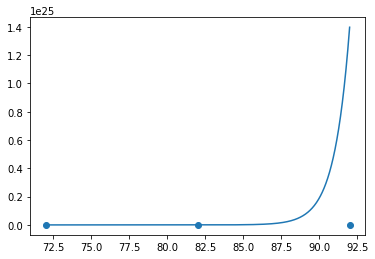

In [ ]:
#Curve Fitting and stuff
#Not working well, doing it by hand.
#TO DO: EXPAND RANGE TO ~1000 planes to get smooth data -> curve fit -> get VERY precise values.
from scipy.optimize import curve_fit
W_S = [72.01,82.01,92.01]
w0s = []
for i in Neg_T_W:
  w0s.append(i.get_w0())
def func(x, a, b, c):
    return a * np.exp(b * x) + c
popt, pcov = curve_fit(func, W_S, w0s)
#print(popt)
plt.scatter(W_S,w0s)
x = np.linspace(72.0,92,1000)
plt.plot(x,func(x,))

In [ ]:
#Fuel volume, battery volume
rho_kero = 50 #lb/ft^3
w0 = 68343
wf_w0 = .20
wf = wf_w0 * w0
KvolNeeded = wf/rho_kero
print(str(KvolNeeded) + " ft^3 needed for fuel.")
m_batt = 6276 #kgs
e_bat = 1050 #WH/kg
volE_bat = 1270 #WH/L
BvolNeeded =   m_batt * e_bat / (volE_bat * 28.3168) 
print(str(BvolNeeded) + " ft^3 needed for battery.")

273.372 ft^3 needed for fuel.
183.24171155066233 ft^3 needed for battery.
